## **Decision Tree capable of forecasting car prices spanning the years 1970 to 2024.**

# **Imports**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import joblib
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("D:/Advanced Machine Learining Project/Dataset/CarsData2.csv")

# **Data Processing**

In [3]:
data.shape

(97712, 10)

In [4]:
data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


**Check for missing data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [6]:
print(data['model'].value_counts())
print('------------------')
print(data['transmission'].value_counts())
print('------------------')
print(data['fuelType'].value_counts())
print('------------------')

model
 Fiesta             6509
 Golf               4797
 Focus              4555
 C Class            3694
 Corsa              3285
                    ... 
 Transit Tourneo       1
200                    1
 Ranger                1
180                    1
220                    1
Name: count, Length: 196, dtype: int64
------------------
transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64
------------------
fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64
------------------


# **Data Visualization**

C:\Users\PC\AppData\Local\Temp\ipykernel_18588\2981500132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='price', data=total_prices_per_year, palette='rainbow')
C:\Users\PC\AppData\Local\Temp\ipykernel_18588\2981500132.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())


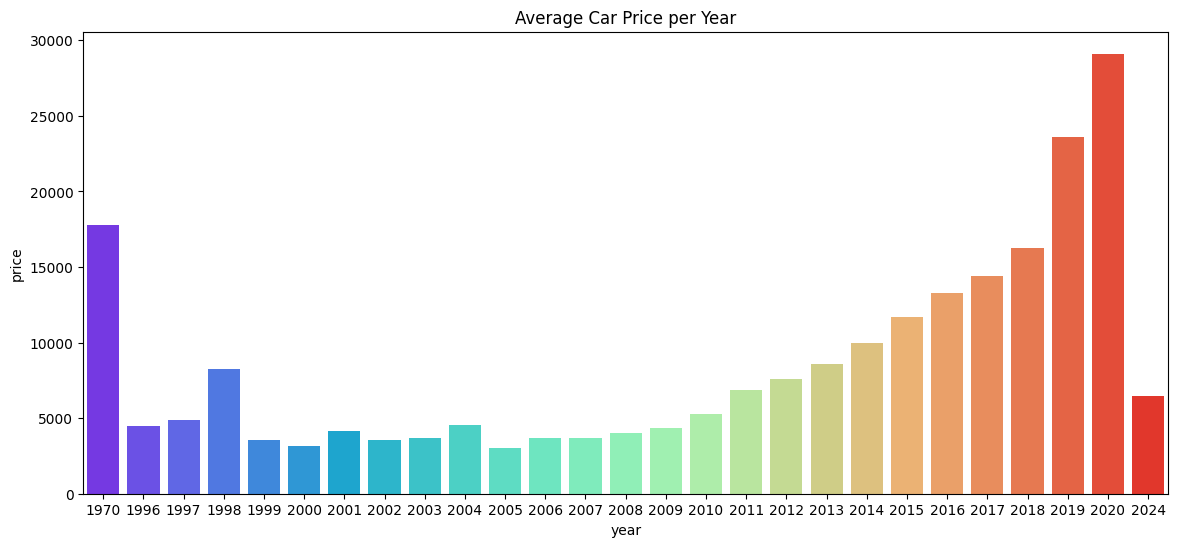

In [7]:
total_prices_per_year = data.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='year', y='price', data=total_prices_per_year, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Average Car Price per Year')
plt.show()

In [8]:
data['Manufacturer'].value_counts()

Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_18588\879570227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Manufacturer', data=data, palette='rainbow')
C:\Users\PC\AppData\Local\Temp\ipykernel_18588\879570227.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


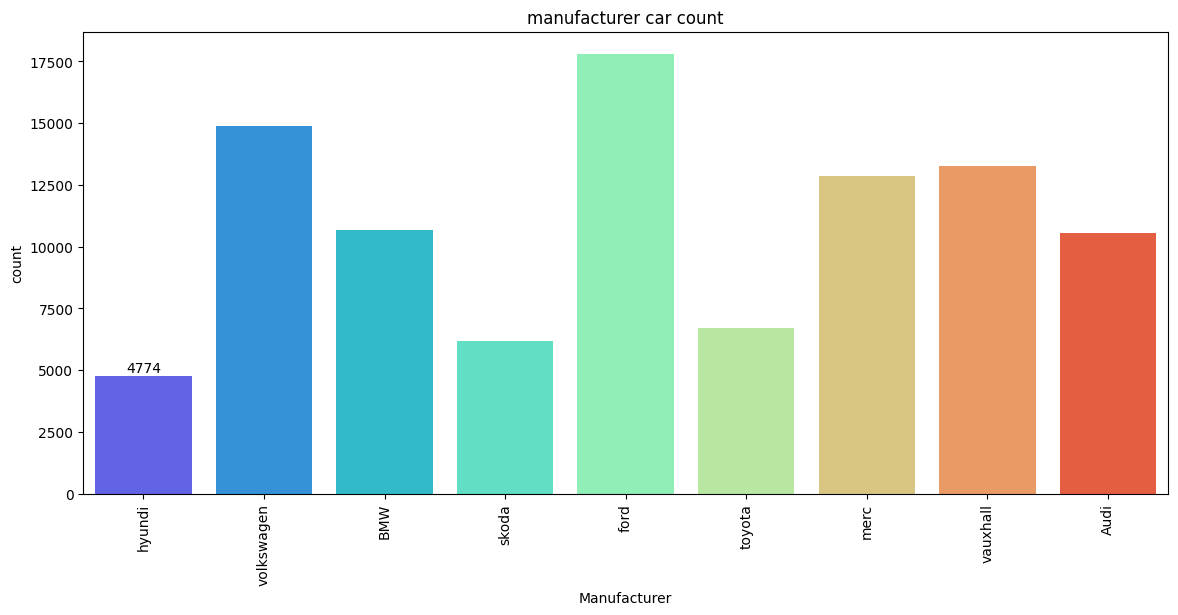

In [9]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Manufacturer', data=data, palette='rainbow')
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('manufacturer car count')
plt.show()

In [10]:
import plotly.express as px
fuel_type_counts = data["fuelType"].value_counts().reset_index()
fig = px.pie(fuel_type_counts, values='count', names='fuelType', title='Distribution of Fuel Types')
fig.show()

In [11]:

import plotly.express as px
transmission_type_counts = data["transmission"].value_counts().reset_index()
fig = px.pie(transmission_type_counts, values='count', names='transmission', title='Distribution of Transmission Types')
fig.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_18588\3024746938.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PC\AppData\Local\Temp\ipykernel_18588\3024746938.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



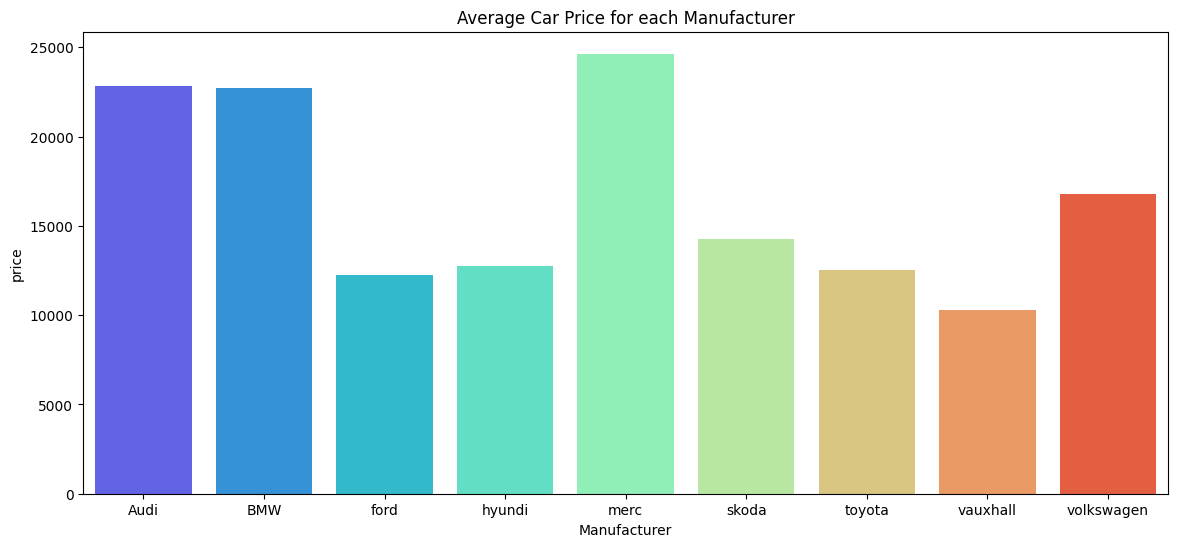

In [12]:
total_prices_per_year = data.groupby('Manufacturer')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Manufacturer', y='price', data=total_prices_per_year, palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Average Car Price for each Manufacturer')
plt.show()

**Looking for correlations**

In [13]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
engineSize    0.639356
year          0.492491
tax           0.307003
mpg          -0.295507
mileage      -0.417996
Name: price, dtype: float64

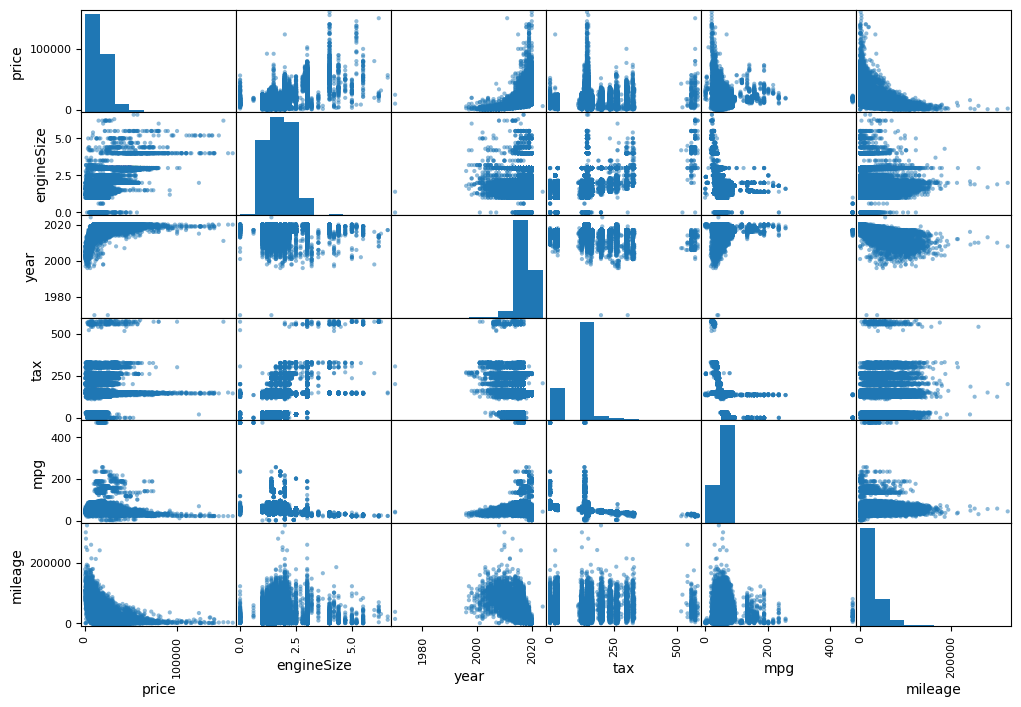

In [14]:
attributes = ["price", "engineSize", "year","tax", "mpg", "mileage"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

# **Feature scaling**

In [15]:
# Data normalization
num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

# Categorical Encoding
cat_pipeline = Pipeline([ 
        ("cat_encoder", OneHotEncoder()),
    ])

num_attribs = ["engineSize", "year","tax", "mpg", "mileage"]
cat_attribs = ["model", "transmission", "fuelType", "Manufacturer"]
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [16]:
X = preprocess_pipeline.fit_transform(data.drop(['price'], axis=1))
joblib.dump(preprocess_pipeline, 'preprocess_pipeline.joblib')
joblib.dump(preprocess_pipeline, 'preprocess_pipeline.pkl')
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning Model: USING DECISION TREE**

In [17]:
# train the model
tree_reg = DecisionTreeRegressor(max_depth= 19, min_samples_leaf= 2, min_samples_split= 13)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=19, min_samples_leaf=2, min_samples_split=13)

In [18]:
y_pred_train = tree_reg.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
print("R-squared on test data:", r2_train)

R-squared on test data: 0.9691295819023784


In [19]:
y_pred_testt = tree_reg.predict(X_test)

r2_test = r2_score(y_test, y_pred_testt )
print("R-squared on test data:", r2_test)

R-squared on test data: 0.939466873322507


**Decision Tree Regression**

In [23]:
param_dist = {
    "max_depth": randint(1, 20), 
    "min_samples_split": randint(2, 20), 
    "min_samples_leaf": randint(1, 20),  
}

tree_reg = DecisionTreeRegressor()
random_search = RandomizedSearchCV(tree_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
best_tree_reg = random_search.best_estimator_
y_pred_test = best_tree_reg.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared on test data:", r2_test)


Best parameters: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 13}
R-squared on test data: 0.9396433207607037


In [21]:
model_path = "random_search_dt.joblib"
dump(random_search, model_path)

['random_search_dt.joblib']

# **Plot the Predicted vs Actual Price**

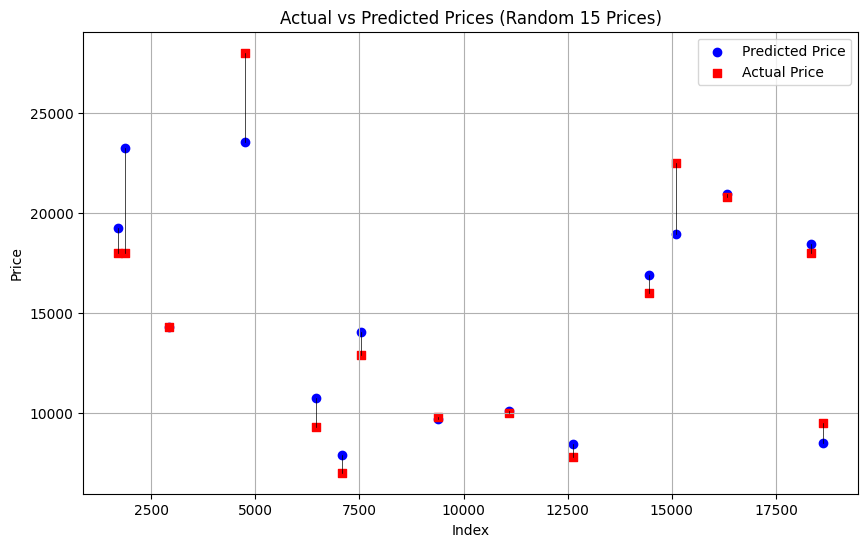

In [22]:
random_indices = random.sample(range(len(y_pred_test)), 15)

plt.figure(figsize=(10, 6))
plt.scatter(random_indices, y_pred_test[random_indices], label='Predicted Price', color='blue', marker='o')
plt.scatter(random_indices, y_test.values[random_indices], label='Actual Price', color='red', marker='s')


for i in random_indices:
    plt.plot([i, i], [y_pred_test[i], y_test.values[i]], color='black', linestyle='-', linewidth=0.5)

plt.title('Actual vs Predicted Prices (Random 15 Prices)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()